# Udacity Enron ML Project

## Overview
I will address the 6 questions mentioned in the project summary in this document, and also follow these steps in my analysis:
1. Data Exploration
2. Feature Selection
3. Algorithm Selection
4. Model Validation

### Section 1:  Data Exploration

#### Questions addressed:
#### Q1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?

**Data set background**
* There are 146 rows in the data, corresponding to 146 Enron employees
* The data set has 21 features of interest
* Of the 146 employees, 18 are POIs

In [3]:
import pickle
import sys
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset
data_set = pickle.load(open("final_project_dataset.pkl", "r") )

In [5]:
# number of data points or Enron personnel
len(data_set.keys())

146

The dataset has 21 features or variables

In [6]:
# number of features
num_features = len(data_set[data_set.keys()[0]])

print num_features

21


It looks like there are 18 POIs in the data set

In [7]:
# number of POIs
num_poi = 0
for i in data_set.values():
    if i['poi'] == 1:
        num_poi += 1
print num_poi

18


Here is a sampling of the features and values for one particular data point or person (Mark Metts)

In [8]:
features = data_set.values()
print features[0]

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


#### Missing Values and Outliers exploration

I have used python Pandas and numpy below to practice my usage based on previous Data Analysis nanodegree courses.

In [9]:
import pandas as pd
import numpy as np

Using 'orient = index' as the keys of the data dictionary (i.e. the employees) are to represented as rows and not columns in the resulting data frame.

In [10]:
df = pd.DataFrame.from_dict(data_set, orient = 'index')

Looking at 2 sample data points (rows), we see that the missing values are represented by NaNs

In [11]:
df.head(2)

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


If I try and get a summary/info about the data set, I see that the NaN values are not actually treated as NaN values because they are strings

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-null object


I therefore need to convert them to a non-string value - either a 0 or nan value. Given that 0 values can mess with averages and other math calculations, I will prefer going with nan values.

In [13]:
df = df.replace('NaN', np.nan)

Now running an info function shows the actual missing values per feature.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

It looks like several variables have many values missing and it might make sense to exclude them from our analysis.

In [15]:
(df.isnull().sum() / len(df.index)) * 100

salary                       34.931507
to_messages                  41.095890
deferral_payments            73.287671
total_payments               14.383562
exercised_stock_options      30.136986
bonus                        43.835616
restricted_stock             24.657534
shared_receipt_with_poi      41.095890
restricted_stock_deferred    87.671233
total_stock_value            13.698630
expenses                     34.931507
loan_advances                97.260274
from_messages                41.095890
other                        36.301370
from_this_person_to_poi      41.095890
poi                           0.000000
director_fees                88.356164
deferred_income              66.438356
long_term_incentive          54.794521
email_address                23.972603
from_poi_to_this_person      41.095890
dtype: float64

Variables that can be excluded:
* deferral_payments            73.287671
* restricted_stock_deferred    87.671233
* loan_advances                97.260274
* director_fees                88.356164
* deferred_income              66.438356
* long_term_incentive          54.794521
* email_address                23.972603

#### Outliers Analysis

I will now use the seaborn package as used in a previous nanodegree class, to plot the data points to spot outliers.

In [16]:
import seaborn as sns
%matplotlib inline

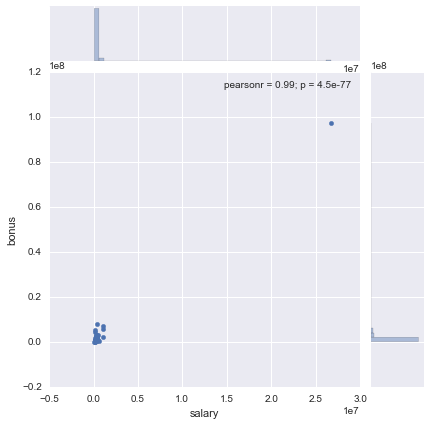

In [17]:
sns.jointplot(x="salary", y="bonus", data=df, dropna=True)
sns.plt.show()

In [18]:
df[df.salary > 1e7].index

Index([u'TOTAL'], dtype='object')

So there is a row with key value 'Total' that seems to be summing up all values for each feature, which explains the large value. This can easily be dropped as it is not useful to us.

In [19]:
df = df.drop('TOTAL')

Replotting:

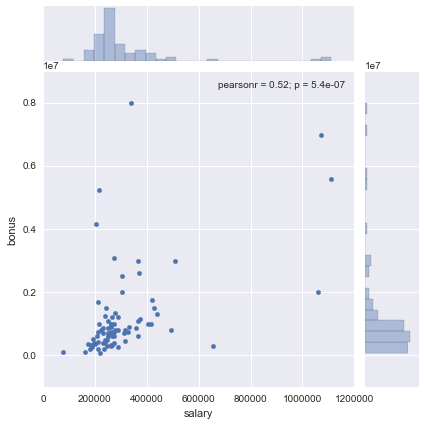

In [20]:
sns.jointplot(x="salary", y="bonus", data=df, dropna=True)
sns.plt.show()

In [21]:
df[df.salary > 1e6].index

Index([u'FREVERT MARK A', u'LAY KENNETH L', u'SKILLING JEFFREY K'], dtype='object')

In [22]:
df[df.bonus > (0.6 * 1e7)].index

Index([u'LAVORATO JOHN J', u'LAY KENNETH L'], dtype='object')

**A few takeaways from the outlier analysis:**
* There are 4 employees who have very high bonus or salary values compared to the rest of the population. 
* However these are definitely going to be POIs or important employees given that the names Kenneth Lay and Jeffrey Skilling are among them. So we keep them in the data set.

Plotting salary/bonus by dividing among POI and non-POI employees: We can see that 2 out of the 4 outliers are definitely POIs

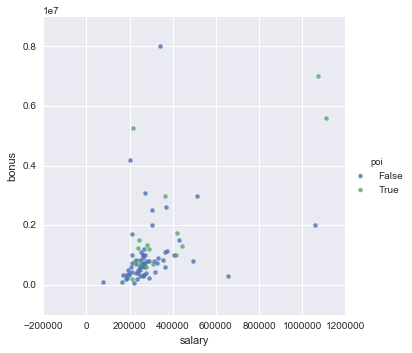

In [23]:
poi_plot = sns.lmplot('salary', 'bonus', data=df, hue='poi', fit_reg=False)
sns.plt.show()

### Section 2:  Feature Selection

#### Questions addressed:
#### Q2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it.  In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values. 

We already removed 7 features as we did not have enough data points on them or they did not add any information value:
* deferral_payments            
* restricted_stock_deferred    
* loan_advances                
* director_fees                
* deferred_income              
* long_term_incentive 
* email_address

Next, I will try to redo some of the financial features since we have outliers that are skewing the data.

I will start by taking the square root and cube root of some features and seeing if it helps the distribution of the data

In [24]:
df['salary_sqrt'] = np.sqrt(df.salary)
df['bonus_sqrt'] = np.sqrt(df.bonus)

It looks like the distribution of the data is better now and so I will keep these features in.

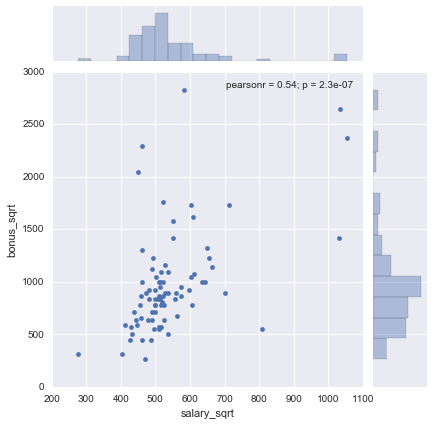

In [25]:
sns.jointplot(x = 'salary_sqrt', y= 'bonus_sqrt', data = df, dropna = True)
sns.plt.show()

I created 2 new square root variables for total payments and total stock value as the distributions seem better

In [26]:
df['total_payments_sqrt'] = np.sqrt(df.total_payments)
df['total_stock_value_sqrt'] = np.sqrt(df.total_stock_value)

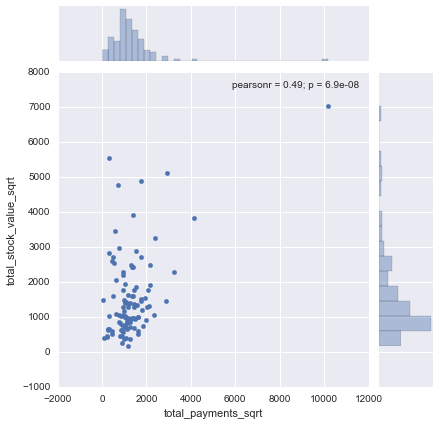

In [27]:
sns.jointplot(x = 'total_payments_sqrt', y= 'total_stock_value_sqrt', data = df, dropna = True)
sns.plt.show()

I'll also create a ratio variable: salary to bonus ratio 

In [28]:
df['salary_to_bonus_ratio'] = df.salary / df.bonus

I also created some new variables using the email features

First I want to see if any person has received or sent emails to/from a POI, disproportionate to other employees. I will use a ratio to see this

In [29]:
df['msgs_sent_to_poi_ratio'] = df.from_this_person_to_poi / df.to_messages

In [30]:
df['msgs_received_from_poi_ratio'] = df.from_poi_to_this_person / df.from_messages

### Feature Scaling
**Feature Scaling** is used for standardizing or normalizing the features in the dataset. The normalization process is important for the algorithms used to classify the data as it helps overcome any disparities due to the different units of the financial and email features being used.

I used feature scaling to an extent by taking ratios for the salary to bonus and by taking ratios for some of the email features (msgs_sent_to_poi_ratio and msgs_received_from_poi_ratio). As seen later, these features did not ultimately prove to be useful in my final model however.

Next, I used the feature selection function of the decision tree algorithm to try and find the best features.

In [87]:
# List of all features, and the poi label
financial_features = ['salary', 'total_payments', 'bonus', 'total_stock_value', 
                      'expenses', 'exercised_stock_options', 'other', 'restricted_stock',
                      'salary_to_bonus_ratio', 'total_payments_sqrt', 'total_stock_value_sqrt',
                      'salary_sqrt', 'bonus_sqrt']

email_features = ['to_messages', 'from_poi_to_this_person', 'from_messages', 
                  'from_this_person_to_poi', 'shared_receipt_with_poi', 
                  'msgs_sent_to_poi_ratio', 'msgs_received_from_poi_ratio']

poi_label = ['poi']
features_list = poi_label + financial_features + email_features

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

I'll convert my dataframe back into a dictionary

In [88]:
df = df.replace(np.nan, 'NaN')
data_dict = df[features_list].to_dict(orient = 'index')

Splitting into labels versus features

In [90]:
data_new = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data_new)

In [91]:
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features,
                                                                                             labels, 
                                                                                             test_size=0.1, 
                                                                                             random_state=42)

We have 21 features now: We had 21 originally, then we removed 7 and added in 7

In [92]:
clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [93]:
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

accuracy 0.733333333333


By looking at feature importances, I can see what features to keep, especially out of the financial features since many of them are very closely correlated (being derived from one another).

* The features total_stock_value_sqrt, salary_sqrt and bonus_sqrt have no added value so i will drop them
* I will keep in the new email features for now (msgs sent to poi ratio, msgs received from poi ratio) even though they have a weight of 0, though I might drop them later

In [94]:
feature_weights = clf.feature_importances_
pointer = np.argsort(feature_weights)[::-1]
for i in range(20):
    print features_list[i+1], " :", feature_weights[pointer[i]]

salary  : 0.217432156349
total_payments  : 0.133410045837
bonus  : 0.132276727205
total_stock_value  : 0.126644311571
expenses  : 0.116307773109
exercised_stock_options  : 0.0930660725829
other  : 0.0609768907563
restricted_stock  : 0.0602240896359
salary_to_bonus_ratio  : 0.059661932955
total_payments_sqrt  : 0.0
total_stock_value_sqrt  : 0.0
salary_sqrt  : 0.0
bonus_sqrt  : 0.0
to_messages  : 0.0
from_poi_to_this_person  : 0.0
from_messages  : 0.0
from_this_person_to_poi  : 0.0
shared_receipt_with_poi  : 0.0
msgs_sent_to_poi_ratio  : 0.0
msgs_received_from_poi_ratio  : 0.0


Dropping the variables:

In [95]:
# List of features that are kept, and the poi label
financial_features = ['salary', 'total_payments', 'bonus', 'total_stock_value', 
                      'expenses', 'exercised_stock_options', 'other', 'restricted_stock',
                      'salary_to_bonus_ratio', 'total_payments_sqrt']

email_features = ['shared_receipt_with_poi', 'msgs_sent_to_poi_ratio', 'msgs_received_from_poi_ratio']

poi_label = ['poi']
features_list = poi_label + financial_features + email_features

data_dict = df[features_list].to_dict(orient = 'index')

Checking performance of the classifier for this set of features: I can see that accuracy has improved. I will keep this set of variables and experiment more when trying out algorithms that classify the data best.

In [97]:
data_set = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data_set)
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features,
                                                                                             labels, 
                                                                                             test_size=0.1, 
                                                                                             random_state=42)
clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score


accuracy 0.866666666667


### Section 3:  Algorithm Selection

#### Questions addressed:
#### Q3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?

I tried out 4 different algorithms as seen below. Initially, none of the algorithms except AdaBoost gave me both precision and recall > 0.3. AdaBoost was the only one that did, and I used the basic settings for it.

In order to get a slightly higher precision and/or recall, I tweaked the features list a little more to try and coax a  higher precision and/or recall.

In [41]:
from tester import dump_classifier_and_data, test_classifier

##### Classifier 1: GaussianNB

In [52]:
from sklearn.naive_bayes import GaussianNB

gnbc_clf = GaussianNB()
test_classifier(gnbc_clf, data_dict, features_list)

GaussianNB()
	Accuracy: 0.84400	Precision: 0.35810	Recall: 0.21450	F1: 0.26829	F2: 0.23320
	Total predictions: 15000	True positives:  429	False positives:  769	False negatives: 1571	True negatives: 12231



##### Classifier 2: Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 50, random_state = 202)
test_classifier(rf_clf, data_dict, features_list)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=202, verbose=0, warm_start=False)
	Accuracy: 0.86553	Precision: 0.48562	Recall: 0.14350	F1: 0.22154	F2: 0.16704
	Total predictions: 15000	True positives:  287	False positives:  304	False negatives: 1713	True negatives: 12696



##### Classifier 3: kMeans

In [54]:
from sklearn.cluster import KMeans

km_clf = KMeans(n_clusters=2)
test_classifier(km_clf, data_dict, features_list)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
	Accuracy: 0.85240	Precision: 0.28854	Recall: 0.07300	F1: 0.11652	F2: 0.08582
	Total predictions: 15000	True positives:  146	False positives:  360	False negatives: 1854	True negatives: 12640



##### Classifier 4: AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(n_estimators = 60, random_state = 202)
test_classifier(ab_clf, data_dict, features_list)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=60, random_state=202)
	Accuracy: 0.84220	Precision: 0.38423	Recall: 0.30450	F1: 0.33975	F2: 0.31768
	Total predictions: 15000	True positives:  609	False positives:  976	False negatives: 1391	True negatives: 12024



#### Next Steps 
I decide to go with AdaBoost as it has the highest recall/precision (both above 0.3). Before embarking on any parameter tuning, I decide to try and reduce the feature set slightly to see if it affects the precision and/or recall.

After playing around for a bit, I saw that this feature set with just 7 features increased the accuracy, precision and recall substantially.

In [98]:
# List of all features, and the poi label
financial_features = ['salary', 'total_payments', 'bonus', 'total_stock_value', 
                      'expenses', 'exercised_stock_options', 'salary_to_bonus_ratio']

poi_label = ['poi']

features_list = poi_label + financial_features

In [99]:
data_dict = df[features_list].to_dict(orient = 'index')

In [61]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(n_estimators = 60, random_state = 202)
test_classifier(ab_clf, data_dict, features_list)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=60, random_state=202)
	Accuracy: 0.84933	Precision: 0.42188	Recall: 0.35100	F1: 0.38319	F2: 0.36320
	Total predictions: 15000	True positives:  702	False positives:  962	False negatives: 1298	True negatives: 12038



#### Questions addressed:
#### Q4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? 

In the AdaBoost algorithm, I can see that the precision or recall or both could potentially be improved by tuning the model's parameters. All or most ML models come with 'system default parameters' and these can be used as a starting point. However, if you want to achieve a specific result i.e. a high recall or a high precision or some other metric score, it may be necessary to change the default parameters in order to achieve the specific result(s) desired and also to extract the best possible performace from the model. In other words, changing the parameters can help to *optimize* the ML algorithm.

If the parameters are not tuned well, it can result in a sub-optimal performance and not getting the best metrics and classification results.

For AdaBoost, the tunable parameters are:
* n_estimators: Number of estimators. Default is 50.
* base_estimator: The default is DecisionTree.
* learning_rate: Default value is 1.0. This shrinks the contribution of each classifier. There is a trade-off between learning_rate and n_estimators. 
* algorithm type: SAMME or SAMME.R.
* random_state: Default value is set to np.random

I decide to tune the parameters n_estimators and learning_rate using a function that will print the metrics for each tuned parameter set. I set the random_state = 202 as that random value gave me a fairly high precision and recall to start with. 

In [67]:
def TuneAdaBoostParams(n_estimators, learning_rate, rs):
    from sklearn.ensemble import AdaBoostClassifier
    
    for i in n_estimators:
        for j in learning_rate:
            print "\nn_estimators = ", i, ", learning_rate = ", j, "\n"
            ab_clf = AdaBoostClassifier(n_estimators = i, learning_rate = j, random_state = rs)
            test_classifier(ab_clf, data_dict, features_list)

In [69]:
n_estimators_list = [50, 60]
learning_rate_list = [0.1, 0.3, 0.5, 0.7, 0.9]
TuneAdaBoostParams(n_estimators_list, learning_rate_list, 202)


n_estimators =  50 , learning_rate =  0.1 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=202)
	Accuracy: 0.85607	Precision: 0.37598	Recall: 0.12050	F1: 0.18251	F2: 0.13945
	Total predictions: 15000	True positives:  241	False positives:  400	False negatives: 1759	True negatives: 12600


n_estimators =  50 , learning_rate =  0.3 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.3, n_estimators=50, random_state=202)
	Accuracy: 0.85327	Precision: 0.42275	Recall: 0.27500	F1: 0.33323	F2: 0.29567
	Total predictions: 15000	True positives:  550	False positives:  751	False negatives: 1450	True negatives: 12249


n_estimators =  50 , learning_rate =  0.5 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=202)
	Accuracy: 0.85207	Precision: 0.42705	Recall: 0.32050	F1: 0.36618	F2: 0.33733
	Total predictions: 15000	Tr

It looks like a learning_rate of between 0.7 and 1 and n_estimators of 60 yield the best performance. I manually set the learning_rate to 0.99 and run the model one last time to see that it yields the best performance.

In [82]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(n_estimators = 60, learning_rate = 0.99, random_state = 202)
test_classifier(ab_clf, data_dict, features_list)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.99, n_estimators=60, random_state=202)
	Accuracy: 0.85053	Precision: 0.42649	Recall: 0.35100	F1: 0.38508	F2: 0.36388
	Total predictions: 15000	True positives:  702	False positives:  944	False negatives: 1298	True negatives: 12056



### Section 4:  Model Validation

#### Questions addressed:
#### Q5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  

Validation involves checking the performance of the ML model by testing the model on data that was not previously used. We can validate models by breaking the initial dataset into 2 sections: one for training and the other for validating or testing the model. 

If we were to not use this step of breaking the data into 2 portions, and were to train our model using all the data and then test using only a small portion of the same data, the metrics will be much better than they will be with a new set of brand-new data. That is because the model 'knows' this dataset very well and hence can predict/classify based a subset of it very well. However, it is sure to perform poorly with a new dataset. 

This is called 'overfitting' the model and it means that the model will perform well with only one set of data i.e. the training data. In ordert o generalize the model, testing/validating it on a new data set is absolutely essential.

Cross-validation: This is the process by which we can evaluate our algorithms by training the algorithms on subsets of the available dataset and then evaluating them on the complementary subset of the data. We use the stratified shuffle split cross-validation method as we have very little data samples and POIs to start with and want to extract the maximum information out of this data. This cross-validation method creates multiple train-test sets and helps us to evaluate the algorithms better with the limited data available.

In order to validate my ML model, I used the validation function provided by Udacity in the tester.py script i.e the stratified shuffle split cross-validation method. 

#### Questions addressed:
#### Q6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.

The main evaluation metrics I used were:
* Accuracy
* Precision
* Recall

Average performance for each of these on the 4 different ML models were:

| **Algorithm**      | **Accuracy**  | **Precision**  | **Recall**|
| :---------------:  |:----------:   |:----------:    |:---------:|
| GaussianNB         | 0.84400       | 0.35810        | 0.21450   |
| RandomForest       | 0.86553       | 0.48562        | 0.14350   |
| kMeans             | 0.85240       | 0.28854        | 0.07300   |
| AdaBoost           | 0.85053	     | 0.42649        | 0.35100   |


What do these metrics mean?

* **Accuracy**: This metric tells you how many times the model got its prediction right. The AdaBoost model's accuracy is 0.85 or 85% which means that it got its predictions/classifications right for identifying an Enron employee as a person of interest 85% of the time.


* **Precision**: Precision is a better measure of classifier performance than accuracy. A precision of 43% means that out of the cases that the AdaBoost classifier identifed as POI, 43% really were POIs. Accuracy paints a rosier picture than is actually true and is not actually a very good indicator of classifier performance.



* **Recall**: Recall is a metric that helps us determine the coverage of the classifier. A recall of 35% means that of all of the POIs actually there in the data, the AdaBoost classifier was able to identify 35% of them.
